# TP 2 - Espérance conditionnelle



In [48]:


import numpy as np

n = 100 # nombre d'étapes
T = 1.0 # temps final
deltat = T/n # pas de temps
S0 = 80 # prix initial
sigma = 0.1 # volatilité
up = np.exp(sigma*np.sqrt(deltat)) # up
down = 1/up # down

# taux d'intérêt et facteur d'actualisation
r = 0.1
R = np.exp(r*deltat)

# probabilité risque neutre
p = (R-down)/(up-down)

print("R =",R," p =",p)

R = 1.0010005001667084  p = 0.547524195428134


In [49]:
# matrice des prix de l'actif
def CRR(n,down,up,S0):
    S = np.zeros((n+1,n+1))
    S[0,0] = S0
    for i in range(n):
        S[i+1,0] = S[i,0]*down
        for j in range(i+1):
            S[i+1,j+1] = S[i,j]*up
    return S


In [50]:
S = CRR(n,down,up,S0)
S

array([[ 80.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [ 79.2039867 ,  80.80401337,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [ 78.41589386,  80.        ,  81.6161072 , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [ 30.02488791,  30.63143088,  31.25022683, ..., 213.15649935,
          0.        ,   0.        ],
       [ 29.72613528,  30.32664305,  30.93928188, ..., 211.03555675,
        215.29875779,   0.        ],
       [ 29.43035529,  30.02488791,  30.63143088, ..., 208.93571787,
        213.15649935, 217.46254628]])

In [51]:
# paramètres de l'option
K = S0 # strike (ici, option à la "monnaie")

def payoff(S,K):
    phi = max(S-K,0) # option d'achat
    return phi


In [52]:
# évaluation du prix de l'option par récurrence rétrograde
C = np.zeros((n+1,n+1))
for j in range(n+1):
    C[n,j] = payoff(S[n,j],K) # valeur finale
for i in range(n-1,-1,-1):
    for j in range(i+1):
        C[i,j] = (p*C[i+1,j+1]+(1-p)*C[i+1,j])/R


In [53]:
print("La prime du contrat vaut C0 =",C[0,0])

La prime du contrat vaut C0 = 8.237337130956632


In [54]:
C[0,0]*R**n

9.103665439518002

In [55]:
from scipy.stats import binom

# calcul des valeurs de l'option par formule binomiale directe
CC = np.zeros((n+1,n+1))
for j in range(n+1):
    CC[n,j] = payoff(S[n,j],K) #valeur finale
for i in range(n+1):
    for j in range(i+1):
        for k in range(n+1-i):
            CC[i,j] += payoff(S[n,j+k],K)*binom.pmf(k,n-i,p) # somme binomiale
        CC[i,j] = CC[i,j]/R # facteur d'actualisation


In [56]:
print("La prime du contrat vaut C0=",CC[0,0])
print("Erreur entre les 2 calculs =",np.amax(C-CC))

La prime du contrat vaut C0= 9.094566324394021
Erreur entre les 2 calculs = 0.0


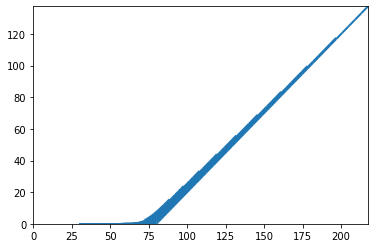

In [57]:
# librairies graphiques
import matplotlib.pyplot as plt
import matplotlib.collections as mc

# liste des couples de points
lines = []
for i in range(0,n+1,10):
    for j in range(i):
        lines.append([(S[i,j],C[i,j]),(S[i,j+1],C[i,j+1])])

# plot
lc = mc.LineCollection(lines, cmap=plt.cm.rainbow, linewidths=2)
fig,ax = plt.subplots()
ax.set_xlim(0,S.max())
ax.set_ylim(0,C.max())
ax.add_collection(lc)
plt.show()


## Variations de la prime en fonction du strike

In [59]:

deltaK = int(S0/10)
CCK = np.zeros(20)
for l in range(20):
    for k in range(n+1):
        Ktmp = l*deltaK
        CCK[l] += payoff(S[n,k],Ktmp)*binom.pmf(k,n,p) #somme binomiale
    CCK[l] = CCK[l]/R**n #facteur d'actualisation
    

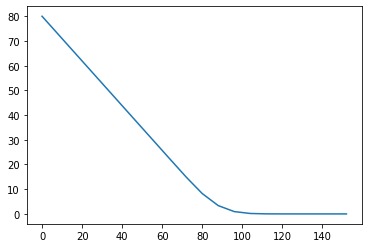

In [60]:
plt.plot(range(0,20*deltaK,deltaK),CCK)
plt.show()

## Variation de la prime en fonction de la volatilité

In [ ]:

deltasigma = 0.02
CCsigma = np.zeros(20)
sigmatab = np.zeros(20)
for l in range(20):
    sigmatab[l] = (l+1)*deltasigma
    uptmp = np.exp(sigmatab[l]*np.sqrt(deltat))
    downtmp = 1/uptmp
    Stmp = CRR(n,downtmp,uptmp,S0)
    ptmp = (R-downtmp)/(uptmp-downtmp)
    for k in range(n+1):
        CCsigma[l] +=  #somme binomiale
    CCsigma[l] = CCsigma[l]/?? #facteur d'actualisation


In [ ]:
plt.plot(sigmatab,CCsigma)
plt.show()